<a href="https://colab.research.google.com/github/Keerthana2048/RL/blob/main/RL8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Program 1: Simple Neural Network on MNIST

# Install dependencies (if not already installed in Colab)
!pip install tensorflow -q

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8630 - loss: 0.4733 - val_accuracy: 0.9549 - val_loss: 0.1485
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9652 - loss: 0.1162 - val_accuracy: 0.9707 - val_loss: 0.0990
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9793 - loss: 0.0699 - val_accuracy: 0.9682 - val_loss: 0.1066
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9832 - loss: 0.0519 - val_accuracy: 0.9723 - val_loss: 0.0926
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9865 - loss: 0.0406 - val_accuracy: 0.9719 - val_loss: 0.1027
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.0948
Test Accuracy: 0.9733999967575073


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8583 - loss: 0.4817 - val_accuracy: 0.9559 - val_loss: 0.1473
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9641 - loss: 0.1208 - val_accuracy: 0.9703 - val_loss: 0.1032
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9766 - loss: 0.0758 - val_accuracy: 0.9685 - val_loss: 0.1078
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9829 - loss: 0.0549 - val_accuracy: 0.9703 - val_loss: 0.1034
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9874 - loss: 0.0412 - val_accuracy: 0.9719 - val_loss: 0.0989
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.0960
Test Accuracy: 0.975600004196167
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


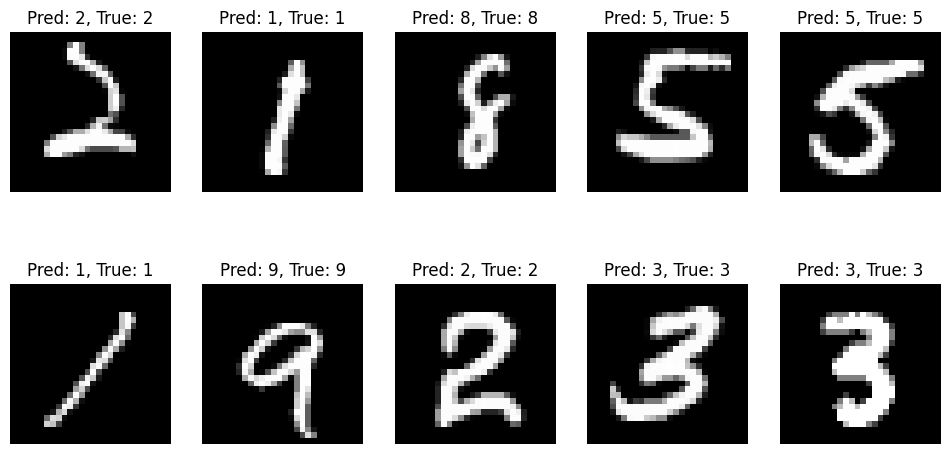

In [ ]:
# Program 1: Simple Neural Network on MNIST with Visualization

!pip install tensorflow matplotlib -q

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("Test Accuracy:", test_acc)

# Predictions
predictions = model.predict(x_test)

# Visualization of 10 random test images with predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    idx = np.random.randint(0, len(x_test))
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"Pred: {np.argmax(predictions[idx])}, True: {y_test[idx]}")
    plt.axis("off")
plt.show()
